In [1]:
#importing packages needed for this notebook
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
from numba import njit, prange
import math

### Importing helper functions
All of the function referenced below can be found in the dart_tracker_functions.py file. The line below allows this notebook to access those functions.

In [2]:
from dart_tracker_functions import*

### Importing csv data file
First, the file that you import needs to be a csv file and organized in the correct format. An example of that can be used that has the basic formatting can be found in the github repositiory.

Once uploaded, the csv will be converted into a pandas dataframe.

In [ ]:
#uploading dart throwing data and converting it to csv
directory_file = ''
with open(directory_file) as fhand:
    df = pd.read_csv(fhand)

### Creating a position array
What the code below does is it creates a 2D array or all zeros with the shape 400,450. Using the distances of different sections of a dart board from the center, each zero is changed to reflect the positional value of the dart board. The values used for each section as as follows:
- 0 = non-dart board positions. Values are never changed from original array
- 0.2 = X2
- 0.3 = X3
- 0.1 = the inner ring between the outside bullseye and the 2X ring
- 0.8 = the outter ring between the 2X and 3X ring
- 0.25 = putter ring of the bullseye
- 0.5 = center of the bullseye
- 0.7 = black outter ring of the dart doard with no value (out of bounds) (represented by the top square)
- 0.99 = bounce/dart does not stick to the board (represented by the lower square)

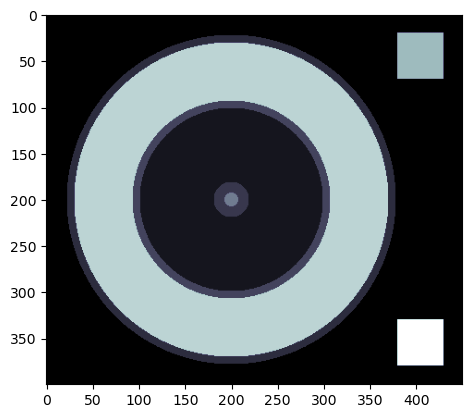

In [3]:
#create an array to define dart board regions (bullseye, 2x, 3x, etc..)
#0=outside_board, 0.2=x2, 0.8=outside ring, 0.3=x3, 0.1=inside ring, 0.25=outer bullseyering, 0.5=bullseye, 0.99 = bouncs, 0.7 = out of bounds
score_position_array = generate_position_array()
plt.imshow(score_position_array, cmap = 'bone')

### Creating a number score array
Similar to the code above,  the code below creates a 2D array or all zeros with the shape 400,450. Using the number values found on a dart board, each zero is changed to reflect the number value of the dart board. The values used for each section are the values found on the dart board.

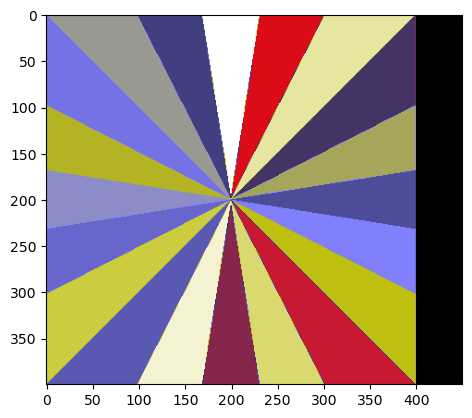

In [4]:
#create an array to define dart board scores
score_number_array = generate_number_array()
plt.imshow(score_number_array, cmap = 'gist_stern')

### Creating a boarder array
Similar to the code above,  the code below creates a 2D array or all zeros with the shape 400,450. The porpose of this code is to eventually allow you to visualize each section of the dart board on your heatmap, even for sections that have not been hit. The basic logis is that the code uses the previous two arrays and finds locations where there is a transition in value (either score of board position) and keeps track of that in another array.

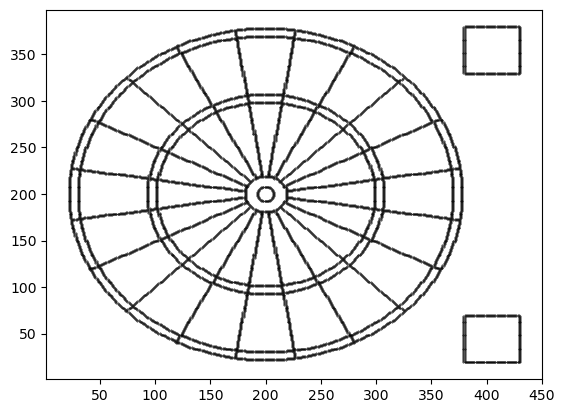

In [5]:
#creat an array to outline dart board sections
boarders_y_coords, boarders_x_coords = generate_outline_array(score_position_array, score_number_array)
plt.scatter(boarders_x_coords, boarders_y_coords, s = 0.1, color = 'black')

### Generate images for a heatmap movie

This is where your data is actually going to be used. What the code below does is create a 3D array with the first dimensioin being each throw and then last two being the two dimensions of a dart board. It then takes the data you provided and modifies the array to reflect the frequency that each section is hit with each subsequent throw.

If you wish to save  each "throw" as an image in order to make a full heatmap movie, then run the second cell in this section.

In [ ]:
#creates a 3D array based in darts thrown
#first dimension is each individual throw
frequency_array = generate_frequency_array(df, score_position_array, score_number_array)
plt.imshow(frequency_array[200, :, :], cmap='jet')
plt.scatter(boarders_x_coords, boarders_y_coords, s = 0.1, color = 'white')

In [ ]:
#save frequency array as individual images
directory = ''
generate_images(df, frequency_array, boarders_y_coords, boarders_x_coords, directory)